In [33]:
import pandas as pd
import json
from urllib.request import urlopen
import yfinance as yf
from datetime import datetime
import seaborn as sns

In [18]:
btc_url = "https://min-api.cryptocompare.com/data/v2/histoday?fsym=BTC&tsym=USD&limit=2000&api_key=d1875a3943f6f2ee83a90ac2e05d5fa018618e00724e9018f9bd08c0ac932cc6"
btc_data = urlopen(btc_url).read() #Open the API contents 
btc_json = json.loads(btc_data) #Transform the contents of our response into a manageable JSON format

In [19]:
#Transform Bitcoin data so we can run analysis
btc_price = btc_json['Data']['Data'] ##Extract only the relevant data from the JSON variable we created earlier
btc_df = pd.DataFrame(btc_price) ##Convert the json format into a Pandas dataframe so we can make it easier to work with 
btc_df['btc_returns'] = ((btc_df['close']/btc_df['open']) - 1) * 100 #We create a coloumn for daily returns of Bitcoin that we'll need for later when we calculate the correlation. 
btc_df['Date'] = btc_df['time'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d')) #Formatting the date into a human-readable format
btc_returns = btc_df[['Date', 'btc_returns']] #In this line, we select the only 2 columns we'll need for our correlation calculations namely the Date and the Return


In [137]:
##Pulling TSLA price history
TSLA = yf.Ticker("TSLA")
TSLA_df = TSLA.history(period = 'max')

In [139]:
##Transform TSLA data so we can run analysis
TSLA = TSLA_df.reset_index() #In the original dataframe, the date is part of the index which means we can't select it later. reset_index shifts the date into a normal column
TSLA['Date'] = TSLA['Date'].apply(lambda x: x.strftime('%Y-%m-%d')) 
TSLA['TSLA_returns'] = ((TSLA['Close']/TSLA['Open']) - 1) * 100
TSLA_returns = TSLA[['Date', 'TSLA_returns']]


In [86]:
##Pulling gold's price history
gold = yf.Ticker("GC=F")
gold_df = gold.history(period = 'max')


In [23]:
gold_df = gold_df.reset_index()
gold_df['Date'] = gold_df['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
gold_df['gold_returns'] = ((gold_df['Close']/gold_df['Open']) - 1) * 100 
gold_returns = gold_df[['Date', 'gold_returns']]



In [140]:
TSLA_returns

,Date,TSLA_returns
0,2010-06-29,25.736840
1,2010-06-30,-7.599849
2,2010-07-01,-12.159996
3,2010-07-02,-16.521739
4,2010-07-06,-19.450003
...,...,...
2929,2022-02-15,2.492221
2930,2022-02-16,1.021829
2931,2022-02-17,-4.041569
2932,2022-02-18,-3.275397


In [27]:
gold_returns

,Date,gold_returns
0,2000-08-30,0.000000
1,2000-08-31,1.273654
2,2000-09-01,0.000000
3,2000-09-05,0.000000
4,2000-09-06,0.000000
...,...,...
5385,2022-02-16,0.618712
5386,2022-02-17,1.300426
5387,2022-02-18,-0.042121
5388,2022-02-22,-0.104816


<AxesSubplot:>

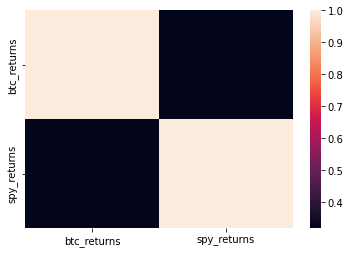

In [150]:
latestdata = joint_df.tail(360)

In [151]:
def calculate_correlation(assetA_df,assetB_df):
    latestdata = pd.merge(assetA_df,assetB_df) ##pd.merge combines the two datafames into a single df.
    correlation = latestdata.iloc[:,1].rolling(30 ).corr(latestdata.iloc[:,2]) ##See notes 
    return correlation

In [152]:
correlation_btc_spy = calculate_correlation(btc_returns,TSLA_returns)
correlation_btc_gold = calculate_correlation(btc_returns,gold_returns)
correlation_gold_spy = calculate_correlation(TSLA_returns, gold_returns)


In [153]:
print ("The correlation between Bitcoin and stocks is " + str(correlation_btc_spy.iloc[-1]))
print ("The correlation between Bitcoin and gold is " + str(correlation_btc_gold.iloc[-1]))
print ("The correlation between stocks and gold is" + str(correlation_gold_spy.iloc[-1]))


The correlation between Bitcoin and stocks is 0.4832844074528318
The correlation between Bitcoin and gold is -0.26994996482203326
The correlation between stocks and gold is-0.19222751618358183


<AxesSubplot:>

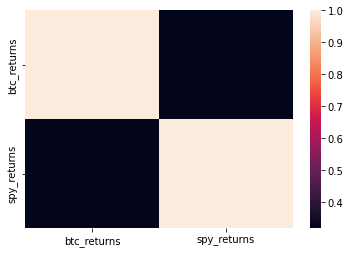

In [145]:
sns.heatmap(latestdata.corr() )

In [93]:
joint_df

,Date,btc_returns,spy_returns
0,2016-09-02,0.576933,-2.248801
1,2016-09-06,0.772583,1.914383
2,2016-09-07,0.453771,-1.844281
3,2016-09-08,2.015623,-1.097469
4,2016-09-09,-0.385249,-2.320558
...,...,...,...
1372,2022-02-15,4.756619,2.492221
1373,2022-02-16,-1.525451,1.021829
1374,2022-02-17,-7.634463,-4.041569
1375,2022-02-18,-1.357575,-3.275397


In [148]:
join3 = latestdata.merge(gold_returns,how='right')

In [149]:
join3

,Date,btc_returns,spy_returns,gold_returns
0,2000-08-30,NaN,NaN,0.000000
1,2000-08-31,NaN,NaN,1.273654
2,2000-09-01,NaN,NaN,0.000000
3,2000-09-05,NaN,NaN,0.000000
4,2000-09-06,NaN,NaN,0.000000
...,...,...,...,...
5385,2022-02-16,-1.525451,1.021829,0.618712
5386,2022-02-17,-7.634463,-4.041569,1.300426
5387,2022-02-18,-1.357575,-3.275397,-0.042121
5388,2022-02-22,3.321940,-1.510553,-0.104816
